In [407]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from pandas_datareader import data as pdr
import FinanceDataReader as fdr

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

# KOSPI와 외국지수 상관관계 분석 및 예측

## 문제정의
 - 문제유형 : 수치 예측
 - 성능 평가 지표 : RMSE

## 데이터 분석

## 데이터 가져오기 및 전처리

In [2]:
kospi = pd.read_csv('./dataset/kospi_data.csv')

In [3]:
kospi = kospi[kospi['Date'].between('2022-01-01', '2022-09-01')]

In [4]:
kospi.drop(['High', 'Low', 'Open', 'Volume', 'Change'], axis = 1, inplace = True)

In [5]:
kospi.rename(columns = {'Close':'KOSPI'},inplace=True)

In [6]:
kospi['Date'] = pd.to_datetime(kospi['Date'])

In [196]:
kospi.set_index('Date', inplace=True)

In [197]:
kospi.head()

,KOSPI
Date,
2022-01-03,2988.77
2022-01-04,2989.24
2022-01-05,2953.97
2022-01-06,2920.53
2022-01-07,2954.89


**데이터 가져오기 및 전처리**

In [404]:
kospi = fdr.DataReader('KS11', '2022-01-01', '2022-12-31')
kospi.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis = 1, inplace = True)
kospi.rename(columns = {'Close':'KOSPI'},inplace=True)
kospi

,KOSPI
Date,
2022-01-04,2989.239990
2022-01-05,2953.969971
2022-01-06,2920.530029
2022-01-07,2954.889893
2022-01-10,2926.719971
...,...
2022-12-05,2419.320068
2022-12-06,2393.159912
2022-12-07,2382.810059


In [403]:
sp500 = fdr.DataReader('US500', '2022-01-01', '2022-12-31')
sp500.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis = 1, inplace = True)
sp500.rename(columns = {'Close':'S&P'},inplace=True)
sp500

,S&P
Date,
2022-01-03,4796.560059
2022-01-04,4793.540039
2022-01-05,4700.580078
2022-01-06,4696.049805
2022-01-07,4677.029785
...,...
2022-12-02,4071.699951
2022-12-05,3998.840088
2022-12-06,3941.260010


In [71]:
nasdaq = fdr.DataReader('IXIC', '2022-01-01', '2022-12-31')
nasdaq.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis = 1, inplace = True)
nasdaq.rename(columns = {'Close':'NASDAQ'},inplace=True)
nasdaq

,NASDAQ
Date,
2022-01-03,15832.799805
2022-01-04,15622.719727
2022-01-05,15100.169922
2022-01-06,15080.860352
2022-01-07,14935.900391
...,...
2022-12-02,11461.500000
2022-12-05,11239.940430
2022-12-06,11014.889648


In [70]:
japan = fdr.DataReader('N225', '2022-01-01', '2022-12-31')
japan.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis = 1, inplace = True)
japan.rename(columns = {'Close':'Nikkei'},inplace=True)
japan

,Nikkei
Date,
2022-01-04,29301.789063
2022-01-05,29332.160156
2022-01-06,28487.869141
2022-01-07,28478.560547
2022-01-11,28222.480469
...,...
2022-12-05,27820.400391
2022-12-06,27885.869141
2022-12-07,27686.400391


In [405]:
china = fdr.DataReader('SSEC', '2022-01-01', '2022-12-31')
china.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis = 1, inplace = True)
china.rename(columns = {'Close':'SSEC'},inplace=True)
china

,SSEC
Date,
2022-01-04,3632.330078
2022-01-05,3595.179932
2022-01-06,3586.080078
2022-01-07,3579.540039
2022-01-10,3593.520020
...,...
2022-12-05,3211.810059
2022-12-06,3212.530029
2022-12-07,3199.620117


In [32]:
usd_krw = fdr.DataReader('USD/KRW', '2022-01-01', '2022-12-31')
usd_krw.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis = 1, inplace = True)
usd_krw.rename(columns = {'Close':'USD/KRW'},inplace=True)
usd_krw.head(-1)

,USD/KRW
Date,
2022-01-03,1187.780029
2022-01-04,1194.680054
2022-01-05,1196.500000
2022-01-06,1199.250000
2022-01-07,1205.780029
...,...
2022-12-02,1303.250000
2022-12-05,1299.170044
2022-12-06,1304.369995


## 데이터 병합

In [94]:
df = pd.concat([kospi, sp500, nasdaq, japan, china, usd_krw], axis=1)
df = df.dropna()
df = round(df, 2)
df

,KOSPI,S&P,NASDAQ,Nikkei,SSEC,USD/KRW
Date,,,,,,
2022-01-04,2989.24,4793.54,15622.72,29301.79,3632.33,1194.68
2022-01-05,2953.97,4700.58,15100.17,29332.16,3595.18,1196.50
2022-01-06,2920.53,4696.05,15080.86,28487.87,3586.08,1199.25
2022-01-07,2954.89,4677.03,14935.90,28478.56,3579.54,1205.78
2022-01-11,2927.38,4713.07,15153.45,28222.48,3567.44,1198.09
...,...,...,...,...,...,...
2022-12-02,2434.33,4071.70,11461.50,27777.90,3156.14,1303.25
2022-12-05,2419.32,3998.84,11239.94,27820.40,3211.81,1299.17
2022-12-06,2393.16,3941.26,11014.89,27885.87,3212.53,1304.37


## 데이터 분석 및 시각화

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 198 entries, 2022-01-04 to 2022-12-08
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   KOSPI    198 non-null    float64
 1   S&P      198 non-null    float64
 2   NASDAQ   198 non-null    float64
 3   Nikkei   198 non-null    float64
 4   SSEC     198 non-null    float64
 5   USD/KRW  198 non-null    float64
dtypes: float64(6)
memory usage: 10.8 KB


In [98]:
df.describe()

,KOSPI,S&P,NASDAQ,Nikkei,SSEC,USD/KRW
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,2528.177879,4102.650051,12273.970556,27280.171667,3231.781313,1292.443737
std,190.746290,289.616472,1287.963237,851.180460,160.514516,73.543591
min,2155.490000,3577.030000,10321.390000,24790.950000,2886.430000,1185.880000
25%,2393.145000,3900.280000,11204.387500,26645.765000,3098.352500,1225.307500
50%,2482.095000,4028.365000,11872.635000,27282.160000,3235.905000,1292.205000
75%,2691.300000,4354.820000,13379.032500,27910.937500,3305.237500,1338.380000
max,2989.240000,4793.540000,15622.720000,29332.160000,3632.330000,1443.960000


**상관관계**

In [99]:
corr_matrix = df.corr()
corr_matrix

,KOSPI,S&P,NASDAQ,Nikkei,SSEC,USD/KRW
KOSPI,1.000000,0.909017,0.883460,0.154667,0.570777,-0.901626
S&P,0.909017,1.000000,0.977141,0.286885,0.576151,-0.822469
NASDAQ,0.883460,0.977141,1.000000,0.222767,0.654038,-0.817404
Nikkei,0.154667,0.286885,0.222767,1.000000,0.144749,0.065965
SSEC,0.570777,0.576151,0.654038,0.144749,1.000000,-0.672342
USD/KRW,-0.901626,-0.822469,-0.817404,0.065965,-0.672342,1.000000


**상관관계 시각화자료**

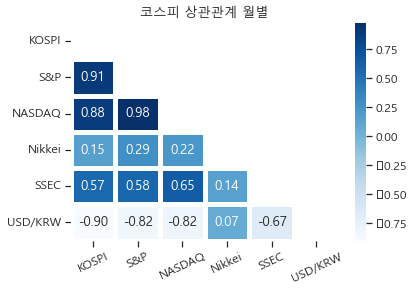

In [406]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask = mask, annot=True, linewidths=5, fmt='.2f', cmap='Blues')
plt.xticks(rotation=25)
plt.title('코스피 상관관계 월별')
plt.show()

**KOSPI 일별 그래프**

<AxesSubplot:title={'center':'코스피 일별 그래프'}, xlabel='Date'>

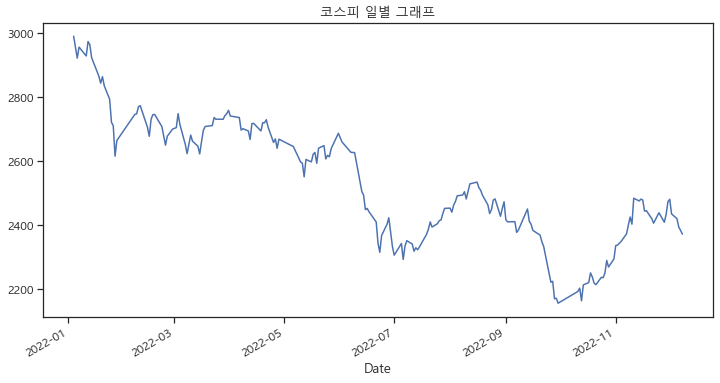

In [410]:
plt.figure(figsize=(12,6))
df['KOSPI'].plot(title='코스피 일별 그래프')

**표준화**
 - 데이터를 시각화해 패턴화 하기 위한 전처리

In [253]:
ss_scaler = StandardScaler()
X_ss = ss_scaler.fit_transform(df)
X_ss

array([[ 2.42327569,  2.39158102,  2.60662568,  2.38109654,  2.50173026,
        -1.33270014],
       [ 2.23790169,  2.06979117,  2.19987914,  2.41686684,  2.26970034,
        -1.30789019],
       [ 2.06214589,  2.05411015,  2.18484847,  1.42244769,  2.21286394,
        -1.27040261],
       ...,
       [-0.7096344 , -0.55866695, -0.98005293,  0.71340182, -0.12023905,
         0.16257697],
       [-0.76403251, -0.58407506, -1.0239073 ,  0.47846266, -0.20087179,
         0.37168947],
       [-0.82568369, -0.48164647, -0.92781533,  0.34658248, -0.21504966,
         0.29521482]])

In [254]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1)) # feature_range=(0, 1)가 기본값, 변경 가능
X_mm = min_max_scaler.fit_transform(df)
X_mm

array([[1.        , 1.        , 1.        , 0.99331236, 1.        ,
        0.03409795],
       [0.95769715, 0.92358468, 0.9014304 , 1.        , 0.9501944 ,
        0.04115003],
       [0.91758921, 0.91986091, 0.89778791, 0.81408259, 0.93799437,
        0.05180564],
       ...,
       [0.28506147, 0.29940568, 0.13081623, 0.6815188 , 0.43718997,
        0.4591212 ],
       [0.27264768, 0.29337202, 0.12018871, 0.63759439, 0.41988202,
        0.51856014],
       [0.25857871, 0.3176957 , 0.14347532, 0.61293796, 0.41683872,
        0.49682269]])

**데이터 표준화**

In [255]:
df_scale = pd.DataFrame(X_ss)
df_scale.index = df.index
df_scale.columns = df.columns
##df3.reset_index(inplace=True)
df_scale.head(10)

,KOSPI,S&P,NASDAQ,Nikkei,SSEC,USD/KRW
Date,,,,,,
2022-01-04,2.423276,2.391581,2.606626,2.381097,2.501730,-1.332700
2022-01-05,2.237902,2.069791,2.199879,2.416867,2.269700,-1.307890
2022-01-06,2.062146,2.054110,2.184848,1.422448,2.212864,-1.270403
2022-01-07,2.242737,1.988271,2.072013,1.411482,2.172017,-1.181387
2022-01-11,2.098148,2.113026,2.241352,1.109867,2.096443,-1.286216
2022-01-12,2.335188,2.158996,2.268549,1.749633,2.283753,-1.404267
2022-01-13,2.280579,1.925962,1.971531,1.423932,2.020370,-1.452660
2022-01-14,2.069452,1.939185,2.039204,0.994205,1.808014,-1.442709
2022-01-18,1.766294,1.642388,1.738085,1.150820,2.111870,-1.395679


**데이터 정규화**

In [256]:
df_mm = pd.DataFrame(X_mm)
df_mm.index = df.index
df_mm.columns = df.columns
##df.reset_index(inplace=True)
df_mm.head(10)

,KOSPI,S&P,NASDAQ,Nikkei,SSEC,USD/KRW
Date,,,,,,
2022-01-04,1.000000,1.000000,1.000000,0.993312,1.000000,0.034098
2022-01-05,0.957697,0.923585,0.901430,1.000000,0.950194,0.041150
2022-01-06,0.917589,0.919861,0.897788,0.814083,0.937994,0.051806
2022-01-07,0.958801,0.904226,0.870444,0.812032,0.929226,0.077108
2022-01-11,0.925805,0.933852,0.911481,0.755642,0.913004,0.047311
2022-01-12,0.979898,0.944768,0.918072,0.875254,0.953211,0.013755
2022-01-13,0.967436,0.889430,0.846093,0.814360,0.896675,0.000000
2022-01-14,0.919256,0.892570,0.862493,0.734018,0.851093,0.002829
2022-01-18,0.850075,0.822089,0.789521,0.763299,0.916316,0.016197


In [107]:
# 정규화 데이터 사용
df_s = df_scale

In [108]:
df_m = df_mm

**그래프를 코스피와 1:1로 매칭해서 표현**

**스케일 전**

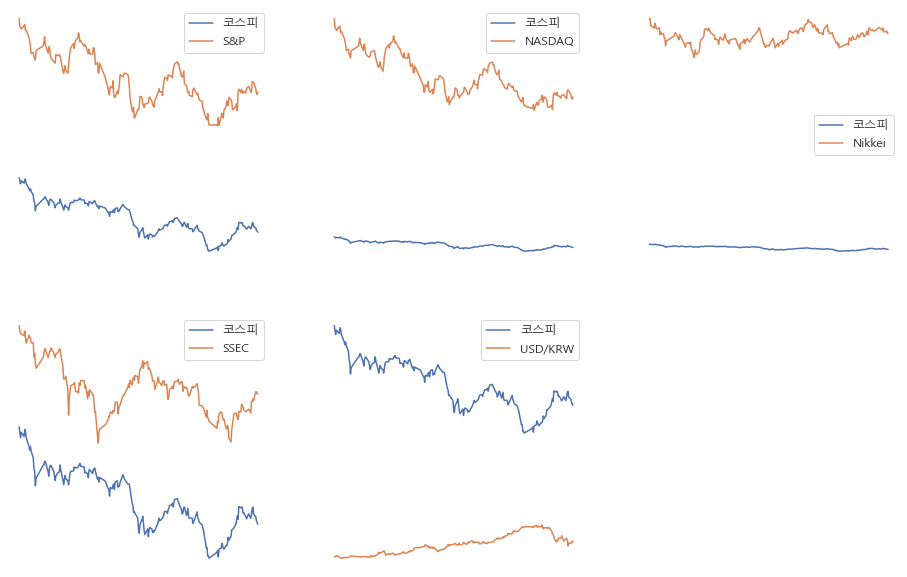

In [259]:
a = df.columns[1:]
plt.figure(figsize=(16,16))
for idx, col in enumerate(a) :
    plt.subplot(3,3,1+int(idx))
    sns.lineplot(data=df, x=df.index, y='KOSPI',label='코스피')
    sns.lineplot(data=df, x=df.index, y=col,label=col)
    plt.axis('off')
plt.show()

**스케일 후**

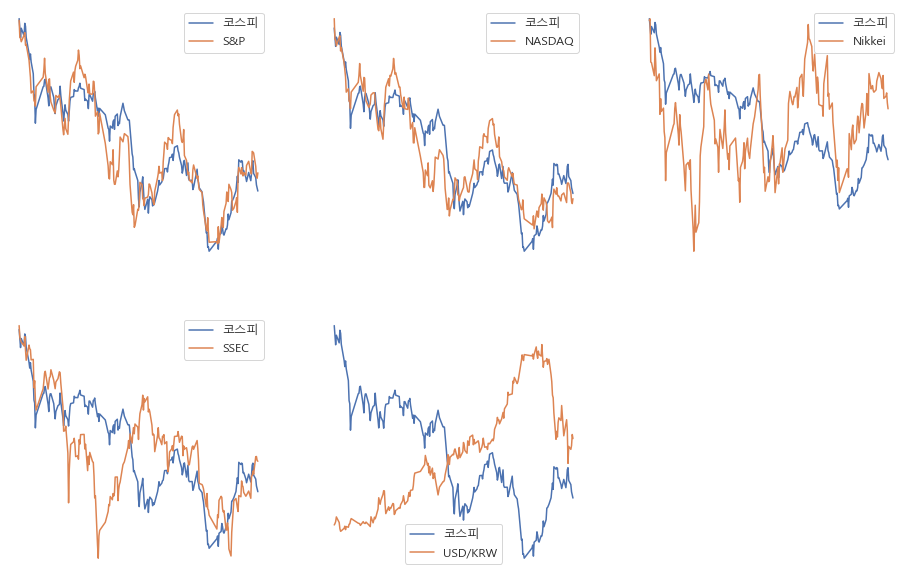

In [260]:
a = df.columns[1:]
plt.figure(figsize=(16,16))
for idx, col in enumerate(a) :
    plt.subplot(3,3,1+int(idx))
    sns.lineplot(data=df_s, x=df_s.index, y='KOSPI',label='코스피')
    sns.lineplot(data=df_s, x=df_s.index, y=col,label=col)
    plt.axis('off')
plt.show()

**산점도**

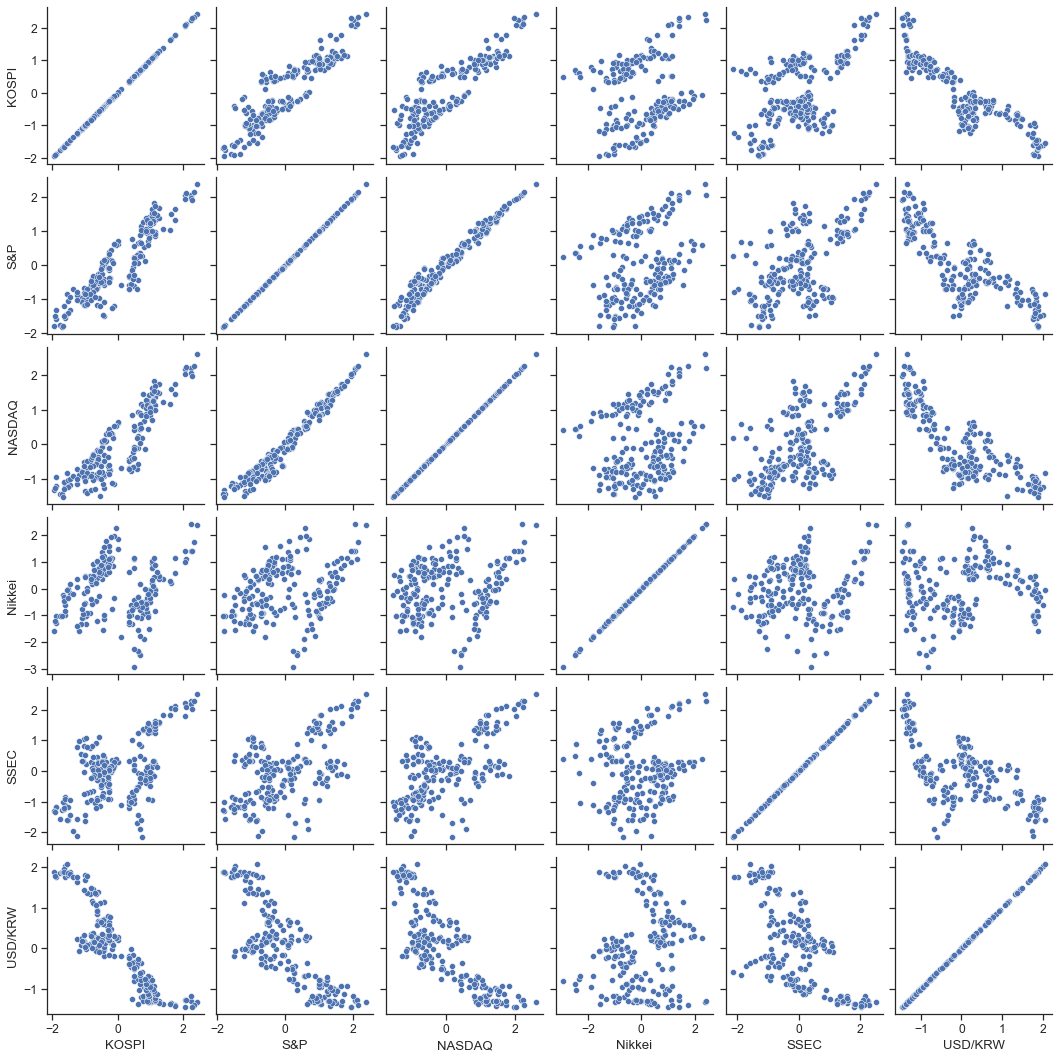

In [111]:
sns.set(font_scale=1.1) ## 폰트사이즈 조절
sns.set_style('ticks') ## 축 눈금 표시
# data = df_s[["KOSPI", "S&P","NASDAQ","Nikkei","SSEC","USD/KRW"]]
sns.pairplot(df_s[["KOSPI", "S&P","NASDAQ","Nikkei","SSEC","USD/KRW"]],diag_kind=None)
plt.show()

**이동 평균선**

In [112]:
roll_mean5 = pd.Series.rolling(df['KOSPI'], window=5, center = False).mean()
roll_mean10 = pd.Series.rolling(df['KOSPI'], window=10, center = False).mean()
roll_mean30 = pd.Series.rolling(df['KOSPI'], window=30, center = False).mean()

<AxesSubplot:xlabel='Date'>

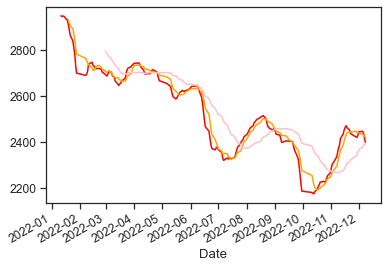

In [113]:
roll_mean5.plot(color='red', label='5 day rolling mean')
roll_mean10.plot(color='orange', label='10 day rolling mean')
roll_mean30.plot(color='pink', label='30 day rolling mean')

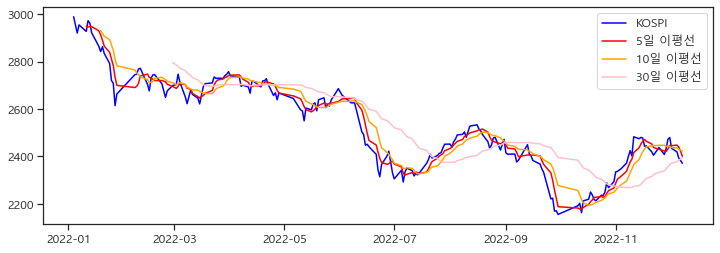

In [408]:
fig = plt.figure(figsize = (12, 4))
chart = fig.add_subplot(1,1,1)

chart.plot(df['KOSPI'], color='blue' , label='KOSPI')
chart.plot(roll_mean5, color='red' , label='5일 이평선')
chart.plot(roll_mean10, color='orange' , label='10일 이평선')
chart.plot(roll_mean30, color='pink' , label='30일 이평선')
plt.legend(loc = 'best')

# 데이터 분리

In [115]:
from sklearn.model_selection import train_test_split
X = df[['S&P', 'NASDAQ','Nikkei','SSEC','USD/KRW']]
y = df['KOSPI']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(178, 5) (20, 5) (178,) (20,)


## 모델 선택과 훈련

In [186]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**데이터 스케일링**

In [216]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_test_pred_scaled = scaler.fit_transform(X_test_pred)

In [207]:
scaler = MinMaxScaler(feature_range=(0, 1)) # feature_range=(0, 1)가 기본값, 변경 가능
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_test_pred_scaled = scaler.fit_transform(X_test_pred)

In [189]:
#tree_reg = DecisionTreeRegressor()
#tree_reg.fit(X_train_scaled, y_train)
#y_pred = tree_reg.predict(X_test_scaled)

**결정트리 모델**

In [360]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)

In [455]:
result = pd.DataFrame({'pred_tree' : y_pred, 'real' : y_test})
result['ratio(%)'] = abs((result['pred_tree'] - result['real']) / result['real']) * 100
result.head(-1)

,pred_tree,real,ratio(%)
Date,,,
2022-11-09,2406.906848,2424.41,0.721955
2022-11-10,2388.315948,2402.23,0.579214
2022-11-11,2436.687856,2483.16,1.871492
2022-11-14,2416.743613,2474.65,2.339983
2022-11-15,2412.962271,2480.33,2.716079
2022-11-16,2422.229159,2477.45,2.228939
2022-11-17,2410.581758,2442.90,1.322946
2022-11-18,2413.062720,2444.48,1.285234
2022-11-21,2417.224792,2419.50,0.094036


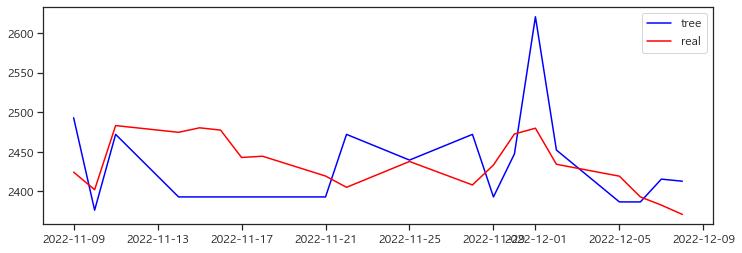

In [363]:
df_pred_tree = pd.DataFrame(y_pred)
df_pred_tree.index = y_test.index

fig = plt.figure(figsize = (12, 4))
chart = fig.add_subplot(1,1,1)

chart.plot(df_pred_tree, color='blue' , label='tree')
chart.plot(y_test, color='red' , label='real')
plt.legend(loc = 'best')

In [364]:
from sklearn.metrics import mean_absolute_error
score_mae_tree = mean_absolute_error(y_test, y_pred)

from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test, y_pred) 
score_rmse_tree = np.sqrt(MSE)

print('tree MAE score:', score_mae_tree)
print('tree RMSE score:', score_rmse_tree)

tree MAE score: 47.777000000000065
tree RMSE score: 58.06972309215885


**리니어 모델**

In [365]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
y_pred

array([2357.83558715, 2421.51758542, 2475.83583948, 2517.7413115 ,
       2504.25143368, 2512.30288287, 2473.73442576, 2474.06447901,
       2481.38690363, 2470.0456278 , 2549.24771724, 2499.74218139,
       2482.2837619 , 2539.64888403, 2615.3840204 , 2567.04793705,
       2545.13375227, 2521.52482251, 2492.91328505, 2507.81605705])

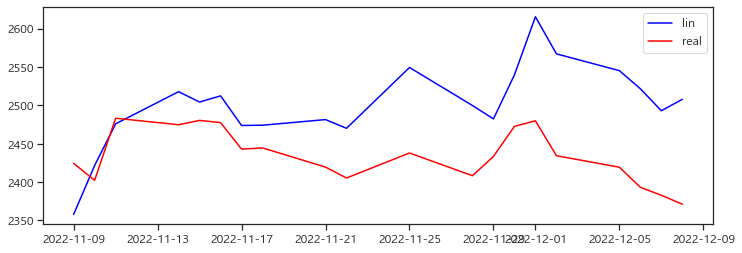

In [366]:
df_pred_lin = pd.DataFrame(y_pred)
df_pred_lin.index = y_test.index

fig = plt.figure(figsize = (12, 4))
chart = fig.add_subplot(1,1,1)

chart.plot(df_pred_lin, color='blue' , label='lin')
chart.plot(y_test, color='red' , label='real')
plt.legend(loc = 'best')

In [367]:
result = pd.DataFrame({'pred' : y_pred, 'real' : y_test})
result['ratio(%)'] = abs((result['pred'] - result['real']) / result['real']) * 100
result.head(-1)

,pred,real,ratio(%)
Date,,,
2022-11-09,2357.835587,2424.41,2.746005
2022-11-10,2421.517585,2402.23,0.802903
2022-11-11,2475.835839,2483.16,0.294953
2022-11-14,2517.741312,2474.65,1.741309
2022-11-15,2504.251434,2480.33,0.964446
2022-11-16,2512.302883,2477.45,1.406805
2022-11-17,2473.734426,2442.90,1.262206
2022-11-18,2474.064479,2444.48,1.210257
2022-11-21,2481.386904,2419.50,2.557839


In [368]:
from sklearn.metrics import mean_absolute_error
score_mae_lin = mean_absolute_error(y_test, y_pred)

from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test, y_pred) 
score_rmse_lin = np.sqrt(MSE)

print('linear MAE score:', score_mae_lin)
print('linear RMSE score:', score_rmse_lin)

linear MAE score: 73.51428209659082
linear RMSE score: 85.18678630977912


**랜덤포레스트 모델**

In [369]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
y_pred

array([2401.4301, 2385.3466, 2447.5254, 2403.7335, 2405.4634, 2411.2162,
       2399.8631, 2399.409 , 2402.6561, 2441.5844, 2491.713 , 2445.027 ,
       2411.3509, 2455.2232, 2540.9559, 2451.9518, 2405.5826, 2400.8974,
       2404.9943, 2400.5629])

In [370]:
result = pd.DataFrame({'pred' : y_pred, 'real' : y_test})
result['ratio(%)'] = abs((result['pred'] - result['real']) / result['real']) * 100
result

,pred,real,ratio(%)
Date,,,
2022-11-09,2401.4301,2424.41,0.947855
2022-11-10,2385.3466,2402.23,0.702822
2022-11-11,2447.5254,2483.16,1.435051
2022-11-14,2403.7335,2474.65,2.865718
2022-11-15,2405.4634,2480.33,3.018413
2022-11-16,2411.2162,2477.45,2.673467
2022-11-17,2399.8631,2442.90,1.761714
2022-11-18,2399.4090,2444.48,1.843787
2022-11-21,2402.6561,2419.50,0.696173


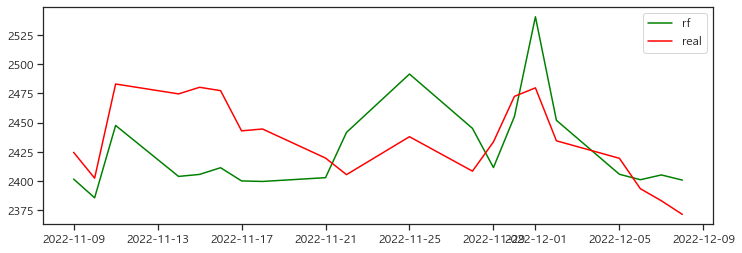

In [371]:
df_pred_rf = pd.DataFrame(y_pred)
df_pred_rf.index = y_test.index

fig = plt.figure(figsize = (12, 4))
chart = fig.add_subplot(1,1,1)

chart.plot(df_pred_rf, color='green' , label='rf')
chart.plot(y_test, color='red' , label='real')
plt.legend(loc = 'best')

In [372]:
from sklearn.metrics import mean_absolute_error
score_mae_rf = mean_absolute_error(y_test, y_pred)

from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test, y_pred) 
score_rmse_rf = np.sqrt(MSE)

print('rf MAE score:', mean_absolute_error(y_test, y_pred))
print('rf RMSE score:', np.sqrt(MSE))

rf MAE score: 35.530829999999675
rf RMSE score: 40.793483071245284


**그라디언트 부스트 모델**

In [327]:
from sklearn.metrics import make_scorer
# log 값 변환 시 언더플로우 영향으로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred, convertExp=True):
    if convertExp:
        y = np.expm1(y)
        pred = np.expm1(pred)
    
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

In [325]:
from sklearn.ensemble import GradientBoostingRegressor

In [328]:
gbrt_params = { 'learning_rate' : [0.01, 0.02, 0.03, 0.04], # 각 트리의 기여도
               'n_estimators' : [1000, 1500],
               'subsample' : [0.9, 0.5, 0.2],
               'max_depth' : [2, 4, 6, 8]
    
}

gbrt = GradientBoostingRegressor()

gridsearch_gbrt = GridSearchCV(gbrt, gbrt_params, scoring=rmsle_scorer, cv=5, n_jobs=-1)

In [338]:
%time gridsearch_gbrt.fit(X_train, y_train)

CPU times: total: 2.22 s
Wall time: 41.8 s


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [2, 4, 6, 8],
                         'n_estimators': [1000, 1500],
                         'subsample': [0.9, 0.5, 0.2]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [374]:
gridsearch_gbrt.best_params_

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 1000, 'subsample': 0.9}

In [375]:
X_test.shape

(20, 5)

In [376]:
best_model = gridsearch_gbrt.best_estimator_

In [377]:
y_pred = best_model.predict(X_test)
y_pred

array([2406.90684791, 2388.315948  , 2436.68785614, 2416.74361331,
       2412.96227061, 2422.22915871, 2410.58175812, 2413.06272014,
       2417.22479175, 2433.5549401 , 2471.27950519, 2433.44086819,
       2422.71033715, 2453.32074701, 2571.57655798, 2465.42274657,
       2418.42716174, 2405.04388237, 2412.77498621, 2408.61396199])

In [378]:
result = pd.DataFrame({'pred' : y_pred, 'real' : y_test})
result['ratio(%)'] = abs((result['pred'] - result['real']) / result['real']) * 100
result

,pred,real,ratio(%)
Date,,,
2022-11-09,2406.906848,2424.41,0.721955
2022-11-10,2388.315948,2402.23,0.579214
2022-11-11,2436.687856,2483.16,1.871492
2022-11-14,2416.743613,2474.65,2.339983
2022-11-15,2412.962271,2480.33,2.716079
2022-11-16,2422.229159,2477.45,2.228939
2022-11-17,2410.581758,2442.90,1.322946
2022-11-18,2413.062720,2444.48,1.285234
2022-11-21,2417.224792,2419.50,0.094036


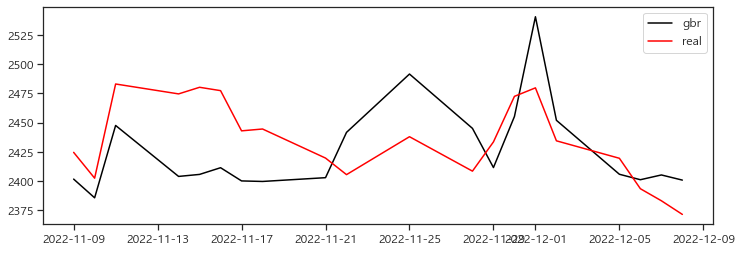

In [379]:
df_pred_gbr = pd.DataFrame(y_pred)
df_pred_gbr.index = y_test.index

fig = plt.figure(figsize = (12, 4))
chart = fig.add_subplot(1,1,1)

chart.plot(df_pred_rf, color='black' , label='gbr')
chart.plot(y_test, color='red' , label='real')
plt.legend(loc = 'best')

In [380]:
from sklearn.metrics import mean_absolute_error
score_mae_gbr = mean_absolute_error(y_test, y_pred)

from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test, y_pred) 
score_rmse_gbr = np.sqrt(MSE)

print('rf MAE score:', mean_absolute_error(y_test, y_pred))
print('rf RMSE score:', np.sqrt(MSE))

rf MAE score: 32.213211899832935
rf RMSE score: 39.05241085935489


In [381]:
best_pred = best_model.predict(X_test_pred)
best_pred

array([2391.9389053 , 2392.68921714, 2393.04695489])

**종합**

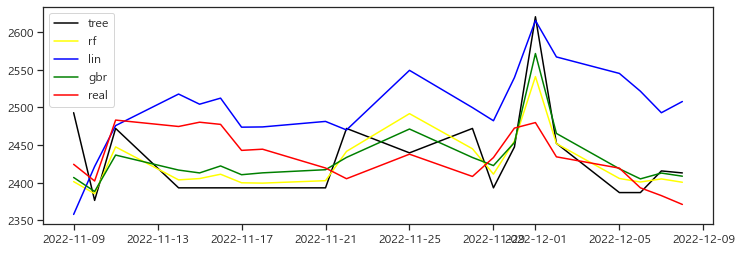

In [383]:
fig = plt.figure(figsize = (12, 4))
chart = fig.add_subplot(1,1,1)

chart.plot(df_pred_tree, color='black' , label='tree')
chart.plot(df_pred_rf, color='yellow' , label='rf')
chart.plot(df_pred_lin, color='blue' , label='lin')
chart.plot(df_pred_gbr, color='green' , label='gbr')
chart.plot(y_test, color='red' , label='real')
plt.legend(loc = 'best')

**ARIMA 모델**

In [135]:
# 아리마 사용하여 코스피 예측
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.arima_model as smt
import statsmodels
from itertools import product

In [295]:
arima_train = df[:'2022-12-02']
arima_test = df['2022-12-03':]
arima_train, arima_test

(              KOSPI      S&P    NASDAQ    Nikkei     SSEC  USD/KRW
 Date                                                              
 2022-01-04  2989.24  4793.54  15622.72  29301.79  3632.33  1194.68
 2022-01-05  2953.97  4700.58  15100.17  29332.16  3595.18  1196.50
 2022-01-06  2920.53  4696.05  15080.86  28487.87  3586.08  1199.25
 2022-01-07  2954.89  4677.03  14935.90  28478.56  3579.54  1205.78
 2022-01-11  2927.38  4713.07  15153.45  28222.48  3567.44  1198.09
 ...             ...      ...       ...       ...      ...      ...
 2022-11-28  2408.27  3963.94  11049.50  28162.83  3078.55  1334.56
 2022-11-29  2433.39  3957.63  10983.78  28027.84  3149.75  1340.12
 2022-11-30  2472.53  4080.11  11468.00  27968.99  3151.34  1325.37
 2022-12-01  2479.84  4076.57  11482.45  28226.08  3165.47  1279.80
 2022-12-02  2434.33  4071.70  11461.50  27777.90  3156.14  1303.25
 
 [194 rows x 6 columns],
               KOSPI      S&P    NASDAQ    Nikkei     SSEC  USD/KRW
 Date                

In [296]:
p = range(0,3)
d = range(1,2)
q = range(0,3)
pdq = list(product(p,d,q))  #조합 만들기

#최적의 파라미터 찾기
#(2,1,2)
aic =[]
for i in pdq:
  model_fit = sm.tsa.arima.ARIMA(df.KOSPI.values, order=(i)).fit()
  #model_fit = model.fit()
  print(f'ARIMA:{i} >> AIC : {round(model_fit.aic,2)}')
  aic.append(round(model_fit.aic,2))

ARIMA:(0, 1, 0) >> AIC : 1929.21
ARIMA:(0, 1, 1) >> AIC : 1930.84
ARIMA:(0, 1, 2) >> AIC : 1932.77
ARIMA:(1, 1, 0) >> AIC : 1930.86
ARIMA:(1, 1, 1) >> AIC : 1932.36
ARIMA:(1, 1, 2) >> AIC : 1934.77
ARIMA:(2, 1, 0) >> AIC : 1932.78
ARIMA:(2, 1, 1) >> AIC : 1934.77
ARIMA:(2, 1, 2) >> AIC : 1936.12


In [320]:
model_fit = sm.tsa.arima.ARIMA(arima_train['KOSPI'], order=(2, 1, 2), trend = 't').fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  KOSPI   No. Observations:                  194
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -944.294
Date:                Fri, 09 Dec 2022   AIC                           1900.587
Time:                        11:47:11   BIC                           1920.163
Sample:                             0   HQIC                          1908.515
                                - 194                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.8889      2.708     -1.067      0.286      -8.197       2.419
ar.L1          0.0074      2.402      0.003      0.998      -4.700       4.715
ar.L2          0.7079      1.943      0.364      0.7

In [321]:
forecast_data = model_fit.forecast(steps=3)
forecast_data, arima_test

(194    2428.728103
 195    2428.232196
 196    2423.440444
 Name: predicted_mean, dtype: float64,
               KOSPI      S&P    NASDAQ    Nikkei     SSEC  USD/KRW
 Date                                                              
 2022-12-05  2419.32  3998.84  11239.94  27820.40  3211.81  1299.17
 2022-12-06  2393.16  3941.26  11014.89  27885.87  3212.53  1304.37
 2022-12-07  2382.81  3933.92  10958.55  27686.40  3199.62  1319.71
 2022-12-08  2371.08  3963.51  11082.00  27574.43  3197.35  1314.10)

In [393]:
pred_y = forecast_data.tolist()
pred_y

[2428.728102894387, 2428.232195925503, 2423.440443743366]

In [517]:
pred_arima_y = forecast_data.tolist()
test_y = y_test

In [61]:
y_test

Date
2022-12-01    2479.84
2022-12-02    2434.33
2022-12-05    2419.32
2022-12-06    2393.16
2022-12-07    2382.81
Name: KOSPI, dtype: float64

In [518]:
pred_arima_y

[2381.478082769998, 2376.643785285861, 2374.779967622734]

**실제 예측**

In [461]:
# 나중에 실제 예측을 위한 가상 데이터
X_test_pred = pd.DataFrame({'S&P':[3967.92, 3971.36, 4000.01],
                             'NASDAQ':[11100.55, 11200.23, 11300.01],
                             'Nikkei':[27274.40, 27274.40, 27374.40],
                             'SSEC':[3127.62, 3127.62, 3227.62],
                             'USD/KRW':[1316.22, 1314.60, 1309.42]}, index = ['2022-12-09', '2022-12-12', '2022-12-13'])   #index 지정

X_test_pred

,S&P,NASDAQ,Nikkei,SSEC,USD/KRW
2022-12-09,3967.92,11100.55,27274.4,3127.62,1316.22
2022-12-12,3971.36,11200.23,27274.4,3127.62,1314.60
2022-12-13,4000.01,11300.01,27374.4,3227.62,1309.42


In [462]:
y_pred_rf = pd.DataFrame(rf_reg.predict(X_test_pred))
y_pred_rf.index = X_test_pred.index
y_pred_rf.columns = ['랜덤포레스트']

y_pred_tree = pd.DataFrame(tree_reg.predict(X_test_pred))
y_pred_tree.index = X_test_pred.index
y_pred_tree.columns = ['결정트리']

y_pred_lin = pd.DataFrame(lin_reg.predict(X_test_pred))
y_pred_lin.index = X_test_pred.index
y_pred_lin.columns = ['리니어']

y_pred_gbr = pd.DataFrame(best_model.predict(X_test_pred))
y_pred_gbr.index = X_test_pred.index
y_pred_gbr.columns = ['그라디언트']

In [463]:
y_pred_all = pd.concat([y_pred_rf, y_pred_tree, y_pred_lin, y_pred_gbr], axis=1)

In [464]:
y_pred_all

,랜덤포레스트,결정트리,리니어,그라디언트
2022-12-09,2380.3548,2376.46,2505.038425,2391.938905
2022-12-12,2380.4985,2376.46,2503.507558,2392.429085
2022-12-13,2388.4494,2376.46,2514.439259,2388.847209


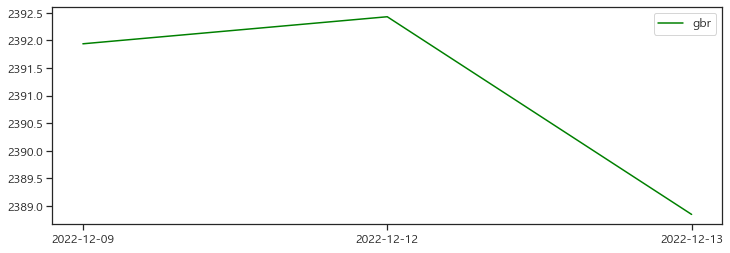

In [465]:
fig = plt.figure(figsize = (12, 4))
chart = fig.add_subplot(1,1,1)

chart.plot(y_pred_gbr, color='green' , label='gbr')
plt.legend(loc = 'best')